# Unit 5 - Financial Planning

In [1]:
!pip install alpaca-trade-api
!pip install alpaca-trade-api --upgrade


In [3]:
# Initial imports
import os
import requests
import pandas as pd
#from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

#%matplotlib inline

In [4]:
import os

# Set your environment variables here
os.environ["ALPACA_API_KEY"] = "PK1MB12IDY8E6TK4Z4Q9"
os.environ["ALPACA_SECRET_KEY"] = "yaMW38ffqUcOHuz0giv3RRraqjsuOwfjKFeEya4J"
os.environ["ALPACA_END_POINT"] = "https://paper-api.alpaca.markets"


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
btc_response_data

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
eth_response_data

# Compute current value of my crpto
btc_current_value = btc_response_data['data']['1']['quotes']['USD']['price']
eth_current_value = eth_response_data['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_current_value:0.2f}") #0.2f prints two decimals on a float
print(f"The current value of your {my_eth} ETH is ${eth_current_value:0.2f}")

The current value of your 1.2 BTC is $26525.00
The current value of your 5.3 ETH is $1626.90


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca_end_point = os.getenv("ALPACA_END_POINT")



alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, base_url="https://paper-api.alpaca.markets")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [10]:
from alpaca_trade_api.rest import REST, TimeFrame
api = REST("PK1MB12IDY8E6TK4Z4Q9","yaMW38ffqUcOHuz0giv3RRraqjsuOwfjKFeEya4J"
)
all_ticker_data = pd.DataFrame()
# Format current date as ISO format
start_date = pd.Timestamp("2023-09-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-09-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
prices_df = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data

SPY = prices_df[prices_df["symbol"]== "SPY"].drop("symbol", axis=1)
AGG = prices_df[prices_df["symbol"]== "AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY,AGG],axis =1, keys = ["SPY", "AGG"])
display(prices_df.head())




SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2023-09-27 04:00:00+00:00  427.09  427.67  422.29  426.05  104705847   

                                                     AGG                    \
                          trade_count        vwap   open     high      low   
timestamp                                                                    
2023-09-27 04:00:00+00:00      693415  425.420572  94.47  94.5122  93.6562   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2023-09-27 04:00:00+00:00  93.85  14560455       29718  93.923234

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(prices_df["AGG"]["close"])
spy_close_price = float(prices_df["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $93.85
Current SPY closing price: $426.05


In [12]:
# Compute the current value of shares
agg_value = (my_agg * agg_close_price)
spy_value = (my_spy * spy_close_price)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $21302.50
The current value of your 200 AGG shares is $18770.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = btc_current_value + eth_current_value  #adding together all crypto
stock_bond_assets = agg_value + agg_value #adding together all stocks and bonds

value_data = {
    'amount': [crypto_assets, stock_bond_assets],
    'asset': ["crypto", "shares"]
}

# Create savings DataFrame
df_savings = pd.DataFrame(value_data).set_index('asset')

# Display savings DataFrame
display(df_savings)

,amount
asset,
crypto,28151.9
shares,37540.0


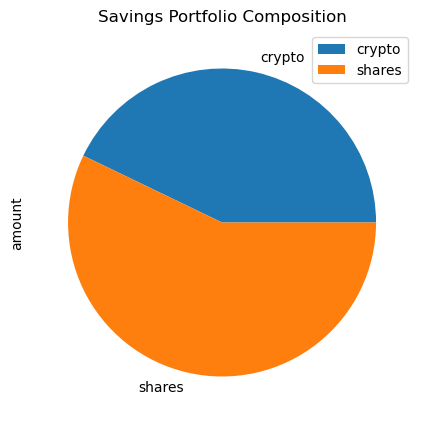

In [14]:
# Plot savings pie chart
pie_chart = df_savings.plot.pie(y= 'amount', title="Savings Portfolio Composition", figsize=(5,5))

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()


# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")

#If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
elif total_savings == emergency_fund:
    print(f"You have reached your financial goal!")

#If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.
else:
    print(f"You're ${emergency_fund - total_savings:0.2f} away from achieving your financial goal. Keep saving!")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
'''start_date1 = pd.Timestamp('2018-09-27', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2021-09-27', tz='America/New_York').isoformat()

start_date2 = pd.Timestamp('2021-09-28', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2023-09-27', tz='America/New_York').isoformat()'''
start_date = pd.Timestamp("2018-09-27", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2023-09-27", tz = "America/New_York").isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG

portfolio_prices = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date

).df


# Reorganize the DataFrame
# Separate ticker data
SPY = portfolio_prices[portfolio_prices["symbol"]== "SPY"].drop("symbol", axis =1)
AGG = portfolio_prices[portfolio_prices["symbol"]== "AGG"].drop("symbol", axis =1)
# Concatenate the ticker DataFrames
portfolio_prices = pd.concat([SPY,AGG],axis =1, keys= ["SPY","AGG"])

# Display sample data
portfolio_prices.head()

SPY                                     \
                             open     high     low   close    volume   
timestamp                                                              
2018-09-27 04:00:00+00:00  290.41  291.910  290.10  290.68  59472319   
2018-09-28 04:00:00+00:00  289.99  291.280  289.95  290.57  70091460   
2018-10-01 04:00:00+00:00  292.11  292.930  290.98  291.70  62578937   
2018-10-02 04:00:00+00:00  291.56  292.355  291.14  291.61  47288227   
2018-10-03 04:00:00+00:00  292.74  293.210  291.32  291.76  64695630   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2018-09-27 04:00:00+00:00      238702  290.901482  105.50  105.64  105.50   
2018-09-28 04:00:00+00:00      267815  290.599861  105.69  105.71  105.51   
2018-10-01 04:00:00+00:00      254454  291.962582  105.35  105.35  105.20   
2018-10-02 04:00:00+00:00      220334  291.709802  105.32  105.46  105.25   
2018-10-03 04:00:00+00:00      258733  292.253915  105.22  105.24  104.75   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2018-09-27 04:00:00+00:00  105.63  2528233       10665  105.573432  
2018-09-28 04:00:00+00:00  105.52  4883958       15703  105.582785  
2018-10-01 04:00:00+00:00  105.24  3518389       10736  105.264691  
2018-10-02 04:00:00+00:00  105.36  6912595       17110  105.384980  
2018-10-03 04:00:00+00:00  104.86  2540484       12195  104.988470

In [30]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio_60SPY_40AGG = MCSimulation(
    portfolio_data = portfolio_prices,
    weights=[.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [32]:
# Printing the simulation input data
display(MC_portfolio_60SPY_40AGG.portfolio_data.head())

SPY                                     \
                             open     high     low   close    volume   
timestamp                                                              
2018-09-27 04:00:00+00:00  290.41  291.910  290.10  290.68  59472319   
2018-09-28 04:00:00+00:00  289.99  291.280  289.95  290.57  70091460   
2018-10-01 04:00:00+00:00  292.11  292.930  290.98  291.70  62578937   
2018-10-02 04:00:00+00:00  291.56  292.355  291.14  291.61  47288227   
2018-10-03 04:00:00+00:00  292.74  293.210  291.32  291.76  64695630   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-09-27 04:00:00+00:00      238702  290.901482          NaN  105.50   
2018-09-28 04:00:00+00:00      267815  290.599861    -0.000378  105.69   
2018-10-01 04:00:00+00:00      254454  291.962582     0.003889  105.35   
2018-10-02 04:00:00+00:00      220334  291.709802    -0.000309  105.32   
2018-10-03 04:00:00+00:00      258733  292.253915     0.000514  105.22   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2018-09-27 04:00:00+00:00  105.64  105.50  105.63  2528233       10665   
2018-09-28 04:00:00+00:00  105.71  105.51  105.52  4883958       15703   
2018-10-01 04:00:00+00:00  105.35  105.20  105.24  3518389       10736   
2018-10-02 04:00:00+00:00  105.46  105.25  105.36  6912595       17110   
2018-10-03 04:00:00+00:00  105.24  104.75  104.86  2540484       12195   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-09-27 04:00:00+00:00  105.573432          NaN  
2018-09-28 04:00:00+00:00  105.582785    -0.001041  
2018-10-01 04:00:00+00:00  105.264691    -0.002654  
2018-10-02 04:00:00+00:00  105.384980     0.001140  
2018-10-03 04:00:00+00:00  104.988470    -0.004746

In [29]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio_60SPY_40AGG.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 110.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 120.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 130.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 140.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 150.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 160.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 170.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 180.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 190.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 200.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 210.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 220.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 230.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 240.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 250.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 260.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 270.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 280.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 290.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 300.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 310.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 320.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 330.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 340.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 350.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 360.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 370.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 380.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 390.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 400.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 410.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 420.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 430.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 440.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 450.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 460.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 470.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 480.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 490.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000938,0.998352,0.994932,1.014556,0.993091,1.008654,1.008183,0.998942,0.999463,1.010054,...,1.003825,0.991052,0.993851,1.014511,1.014320,0.989844,0.991400,1.001814,0.990483,1.003697
2,0.993885,0.997565,0.984491,1.011201,0.985059,1.022856,0.993953,0.991968,0.997950,1.009026,...,1.001978,0.992592,0.985103,1.005019,1.007547,0.989632,0.982019,1.010599,0.992412,1.010531
3,0.997389,0.990759,0.988896,1.016128,0.984794,1.019280,0.978582,0.983679,0.984767,1.020670,...,1.017532,1.007121,0.997153,1.022260,1.011587,0.986005,0.993262,1.012943,0.990930,1.008257
4,1.008618,0.988320,0.969702,1.012754,0.993193,1.021371,0.969987,0.999859,0.971484,1.040706,...,1.000784,1.019116,0.989137,1.028655,1.005796,0.984808,0.999313,1.007888,0.994814,0.998303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.200494,2.281714,1.310535,2.499601,5.661084,2.666351,3.676814,1.548680,6.293604,3.443312,...,6.940095,4.312269,0.560606,2.404003,11.333394,7.019509,3.898200,4.464108,10.847239,4.628193
7557,11.185694,2.283351,1.316310,2.530590,5.632975,2.687698,3.643596,1.566404,6.291935,3.447396,...,6.911079,4.356061,0.557282,2.386640,11.351310,7.025556,3.944690,4.485715,10.777476,4.624971
7558,11.233191,2.273917,1.312994,2.520021,5.604673,2.695244,3.645978,1.570354,6.218348,3.471261,...,6.863522,4.307812,0.555012,2.382370,11.323775,7.019724,3.969761,4.532360,10.910587,4.576693
7559,11.439664,2.288048,1.308441,2.517741,5.596906,2.687059,3.642018,1.574537,6.226605,3.433113,...,6.876562,4.412060,0.547895,2.371348,11.343664,6.978008,4.011437,4.595683,10.987907,4.570581


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

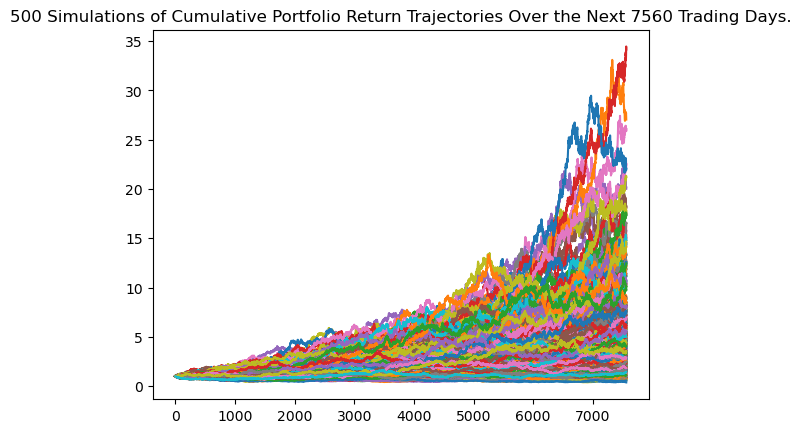

In [28]:
# Plot simulation outcomes
MC_portfolio_60SPY_40AGG.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

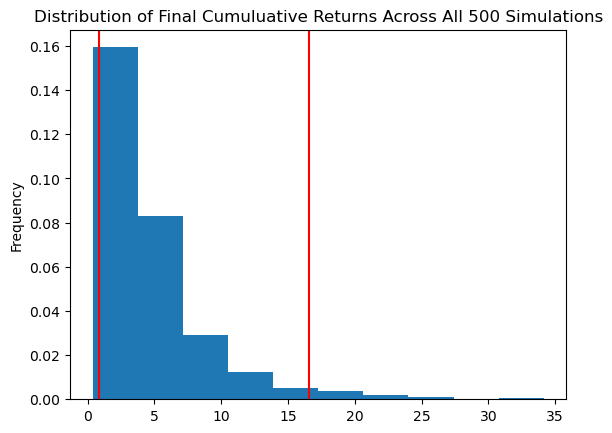

In [25]:
# Plot probability distribution and confidence intervals
MC_portfolio_60SPY_40AGG.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_portfolio_60SPY_40AGG_summary_stats = MC_portfolio_60SPY_40AGG.summarize_cumulative_return()

# Print summary statistics
print(MC_portfolio_60SPY_40AGG_summary_stats)

count           500.000000
mean              4.789326
std               4.129802
min               0.386388
25%               2.161605
50%               3.392760
75%               5.958930
max              34.141814
95% CI Lower      0.873639
95% CI Upper     16.536661
Name: 7560, dtype: float64


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_portfolio_60SPY_40AGG_summary_stats[8] * initial_investment,2)
ci_upper = round(MC_portfolio_60SPY_40AGG_summary_stats[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $17472.78 and $330733.22


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [73]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(MC_portfolio_60SPY_40AGG_summary_stats[8] * initial_investment,2)
ci_upper = round(MC_portfolio_60SPY_40AGG_summary_stats[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $24616.05 and $348750.63


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio_5y = MCSimulation(
    portfolio_data = portfolio_prices,
    weights = [0.8,0.2],  #changed weights of stocks vs. bonds for a more aggressive/riskier portfolio
    num_simulation = 500,
    num_trading_days = 252*5
)

In [36]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 140.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 450.
Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.
Running Monte Carlo simulation number 480.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 490.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009446,0.991334,0.983509,1.004749,0.994925,1.000712,1.006124,0.992527,1.006417,0.991700,...,1.002243,1.015253,1.000260,1.020615,0.992481,1.015995,1.008949,0.989997,0.996112,1.002948
2,1.011623,1.004523,0.992424,1.013386,0.992198,0.999700,0.996648,1.024536,1.033662,0.992454,...,0.995879,1.023281,1.012605,1.010322,0.992454,1.026136,1.002967,0.983802,0.984984,0.990867
3,1.016929,0.995222,0.991646,1.025301,0.989275,1.006320,0.995018,1.014637,1.048243,1.005396,...,0.996352,1.036826,1.005876,1.004216,0.988350,1.015856,1.006041,1.007972,1.011603,0.998859
4,1.016393,0.988883,0.984122,1.043403,0.999600,1.032614,0.983761,1.033152,1.047613,0.993597,...,0.991981,1.042027,0.982614,1.006139,0.985190,1.020659,0.996345,1.007633,1.009477,0.993632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.109650,2.201538,1.840120,1.724707,1.504931,1.887352,2.422343,1.384633,1.030225,2.433752,...,2.452996,2.426064,1.008650,1.213023,1.272647,1.150562,0.871907,1.548536,0.998974,1.644968
1257,1.103350,2.230524,1.829963,1.712309,1.500581,1.907189,2.446779,1.378729,1.008699,2.456415,...,2.448169,2.426439,1.013203,1.199576,1.283380,1.157171,0.865889,1.533166,0.995195,1.650662
1258,1.102188,2.227865,1.843797,1.715527,1.480144,1.922887,2.466436,1.369592,1.015293,2.533908,...,2.469173,2.452218,1.023504,1.200511,1.304485,1.168493,0.851583,1.512396,0.998674,1.637923
1259,1.103132,2.217198,1.840098,1.702852,1.466191,1.908561,2.452981,1.363574,1.009222,2.537759,...,2.486609,2.457485,1.027814,1.206067,1.303968,1.181917,0.854121,1.521086,0.994539,1.604029


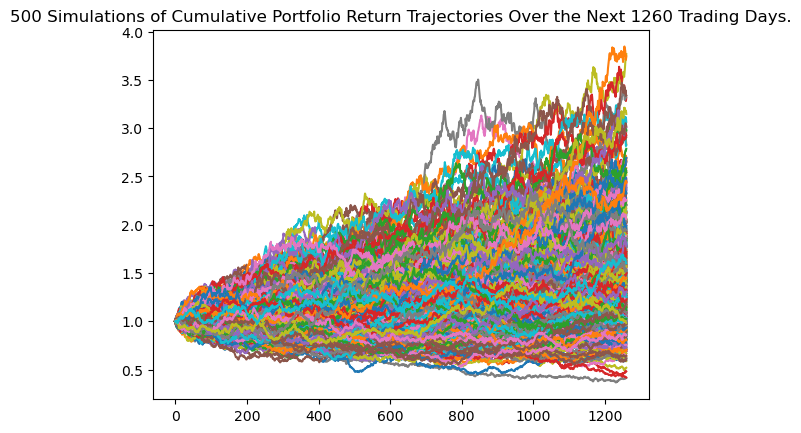

In [37]:
# Plot simulation outcomes
line_plot_5y = MC_portfolio_5y.plot_simulation()

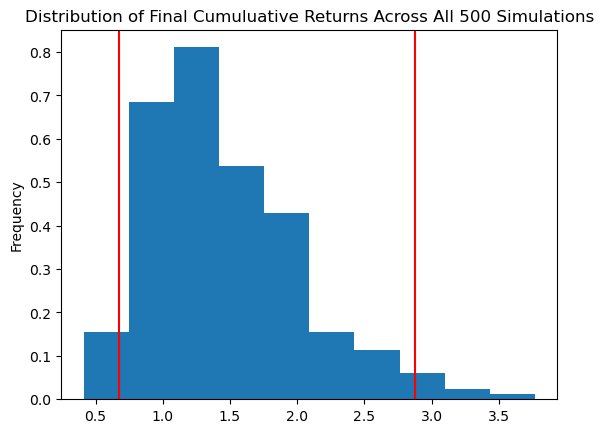

In [38]:
# Plot probability distribution and confidence intervals
dist_plot_5y = MC_portfolio_5y.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_5y = MC_portfolio_5y.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl_5y)

count           500.000000
mean              1.458517
std               0.562848
min               0.413663
25%               1.041504
50%               1.357066
75%               1.778900
max               3.767582
95% CI Lower      0.677030
95% CI Upper      2.874816
Name: 1260, dtype: float64


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [40]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_tbl_5y [8] * initial_investment,2)
ci_upper_five = round(summary_tbl_5y [9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $40621.82 and $172488.95


### Ten Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10y = MCSimulation(
    portfolio_data = portfolio_prices,
    weights = [0.8,0.2],  #changed weights of stocks vs. bonds for a more aggressive/riskier portfolio
    num_simulation = 500,
    num_trading_days = 252*10
)

In [42]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: Performa

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016685,0.991196,0.999351,0.995724,1.026858,1.007793,0.990935,0.996327,1.000518,1.010770,...,0.985057,0.991179,1.008806,0.983067,0.989049,1.004878,1.001492,0.989344,0.985422,0.983944
2,1.014304,0.978401,1.007942,0.988581,1.023974,0.997331,0.978717,0.974924,0.989258,1.007476,...,0.993778,0.989616,1.005554,0.974793,1.006106,1.017769,1.004814,0.995313,1.011870,0.979543
3,1.018588,0.974142,1.010760,0.990701,1.024973,0.994299,0.986580,0.965706,0.996258,0.995472,...,0.984013,0.974977,0.988560,0.960664,1.018724,1.030434,1.008448,1.002202,1.019853,0.989859
4,0.994561,0.966402,1.017919,0.990666,1.021524,0.991473,0.976249,0.968273,1.011349,0.991009,...,0.988595,0.962731,0.990197,0.965691,1.028268,1.033481,1.018317,1.016484,1.024370,1.001854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.362479,2.098549,2.391746,3.218984,2.508157,2.901263,0.914363,0.884716,2.850560,1.077862,...,1.316480,1.510395,0.699960,4.397006,2.508613,2.145877,0.988109,4.314694,2.024696,0.910754
2517,1.405048,2.106974,2.397504,3.243595,2.516224,2.952138,0.918126,0.880045,2.853720,1.073898,...,1.319026,1.527453,0.702067,4.408198,2.525581,2.156120,0.996129,4.301584,2.037773,0.900245
2518,1.434669,2.094161,2.401766,3.225523,2.545487,2.972453,0.921923,0.885277,2.797674,1.076295,...,1.319044,1.532635,0.704692,4.379546,2.564252,2.215094,1.000094,4.399857,2.049658,0.906972
2519,1.418579,2.118917,2.421467,3.237398,2.556805,2.977277,0.915024,0.886599,2.806071,1.089636,...,1.330985,1.530463,0.716648,4.313396,2.573296,2.226617,1.009171,4.431522,2.079033,0.906911


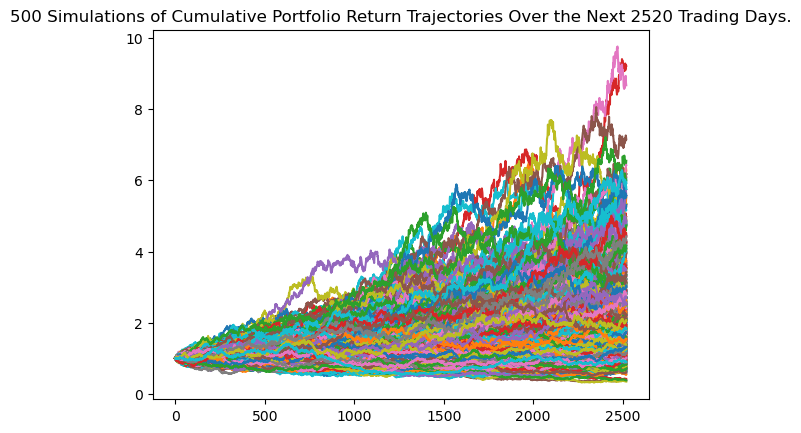

In [43]:
# Plot simulation outcomes
line_plot_10y = MC_portfolio_10y.plot_simulation()

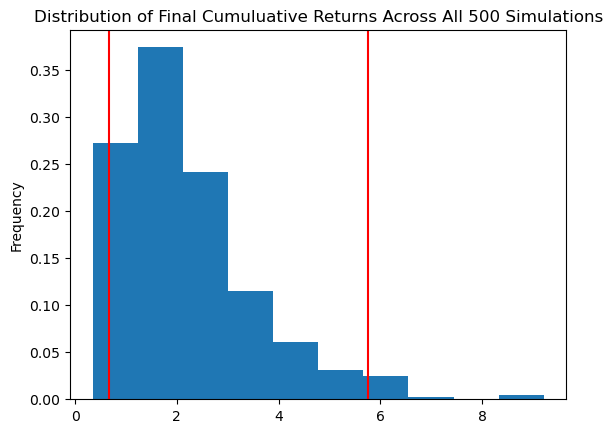

In [44]:
# Plot probability distribution and confidence intervals
dist_plot_10y = MC_portfolio_10y.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_10y = MC_portfolio_10y.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl_10y)

count           500.000000
mean              2.206147
std               1.328758
min               0.346866
25%               1.247211
50%               1.887931
75%               2.714248
max               9.214996
95% CI Lower      0.673562
95% CI Upper      5.751911
Name: 2520, dtype: float64


/Users/tej/USYD-VIRT-FIN-PT-07-2023-U-LOLC/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [46]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_tbl_10y [8] * initial_investment,2)
ci_upper_ten = round(summary_tbl_10y [9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $40413.75 and $345114.65
